ANN.ipynb - AI Training Software  
Copyright (C) 2024 AI Institute, University of South Carolina

Authors:    Homayoun Valafar
            Andrew Smith
            Christopher Lee
            Alireza Bagheri
            Musa Azim
         

This program is free software: you can redistribute it and/or modify  
it under the terms of the GNU General Public License as published by  
the Free Software Foundation, either version 3 of the License, or  
(at your option) any later version.  

This program is distributed in the hope that it will be useful,  
but WITHOUT ANY WARRANTY; without even the implied warranty of  
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the  
GNU General Public License for more details.  

You should have received a copy of the GNU General Public License  
along with this program. If not, see <https://www.gnu.org/licenses/>.  

For inquiries or permissions, contact: Dr. Valafar (homayoun@cse.sc.edu)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [2]:
# Generate a synthetic dataset with easy separability
# X represents all the inputs to the model (e.g., age & height or blood pressure & cholesterol, etc.)
# X is also referred to as features or independent variables
# y represents the target variable (e.g., whether a person has a disease or not)
# y is also referred to as the label or dependent variable
X, y = make_classification(
    n_samples=10000,      # Total number of samples
    n_features=10,         # Number of features (dimensions)
    n_informative=5,     # Number of informative features
    n_redundant=0,       # Number of redundant features
    n_repeated=0,
    n_classes=4,
    n_clusters_per_class=1,
    flip_y=0,            # Fraction of samples whose class is randomly exchanged
    class_sep=1.1,         # Separation between the classes
    weights = [0.25, 0.25, 0.25, 0.25], # Can adjust balance of the data
    hypercube=True,
    random_state=42
)

print(X.shape)
print(y.shape)


(10000, 10)
(10000,)


In [3]:
# Reshape y to 2D (required by OneHotEncoder)
# The following line converts an array [0, 1, 2, 3] to [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]] to represent the four classes
# In the absence of this conversion, the model will have to perform a regression task instead of classification
y_onehot = pd.get_dummies(y).values

print(y[:5])        # Original labels
print(y_onehot[:5]) # One-hot encoded

[1 3 0 1 1]
[[False  True False False]
 [False False False  True]
 [ True False False False]
 [False  True False False]
 [False  True False False]]


In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.3, random_state=42)

In [5]:
# Visualization does not make sense any more. In most practical cases, this type of visualization is not possible
# as the data is high-dimensional. However, we can visualize the first two features.
""" # Plot the generated dataset
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', marker='o', edgecolor='k', s=70, label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', marker='x', edgecolor='k', s=70, label='Test')
plt.title("Synthetic Data for ANN with Easy Separability")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
"""

' # Plot the generated dataset\nplt.figure(figsize=(10, 6))\nplt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=\'coolwarm\', marker=\'o\', edgecolor=\'k\', s=70, label=\'Train\')\nplt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=\'coolwarm\', marker=\'x\', edgecolor=\'k\', s=70, label=\'Test\')\nplt.title("Synthetic Data for ANN with Easy Separability")\nplt.xlabel("Feature 1")\nplt.ylabel("Feature 2")\nplt.legend()\nplt.show()\n'

In [6]:
# Output dataset shapes
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (7000, 10)
Testing data shape: (3000, 10)
Training labels shape: (7000, 4)
Testing labels shape: (3000, 4)


In [7]:
# Train the multilayer ANN
mlp = MLPClassifier(
    hidden_layer_sizes=(10, 5),
    activation='relu',
    solver='adam',
    max_iter=500,
    #learning_rate_init=0.001,
    verbose=True,
    random_state=42
)
mlp.fit(X_train, y_train);

Iteration 1, loss = 2.85884748
Iteration 2, loss = 2.60517028
Iteration 3, loss = 2.36396833
Iteration 4, loss = 2.13458520
Iteration 5, loss = 1.93739173
Iteration 6, loss = 1.76829964
Iteration 7, loss = 1.61367811
Iteration 8, loss = 1.46821438
Iteration 9, loss = 1.33096098
Iteration 10, loss = 1.20602466
Iteration 11, loss = 1.10144190
Iteration 12, loss = 1.01844647
Iteration 13, loss = 0.95420975
Iteration 14, loss = 0.90453319
Iteration 15, loss = 0.86417928
Iteration 16, loss = 0.83048632
Iteration 17, loss = 0.80099334
Iteration 18, loss = 0.77428716
Iteration 19, loss = 0.75039168
Iteration 20, loss = 0.72856079
Iteration 21, loss = 0.70876292
Iteration 22, loss = 0.68869909
Iteration 23, loss = 0.67170766
Iteration 24, loss = 0.65544322
Iteration 25, loss = 0.63980743
Iteration 26, loss = 0.62531718
Iteration 27, loss = 0.61041036
Iteration 28, loss = 0.59672551
Iteration 29, loss = 0.58322491
Iteration 30, loss = 0.57104200
Iteration 31, loss = 0.55981423
Iteration 32, los

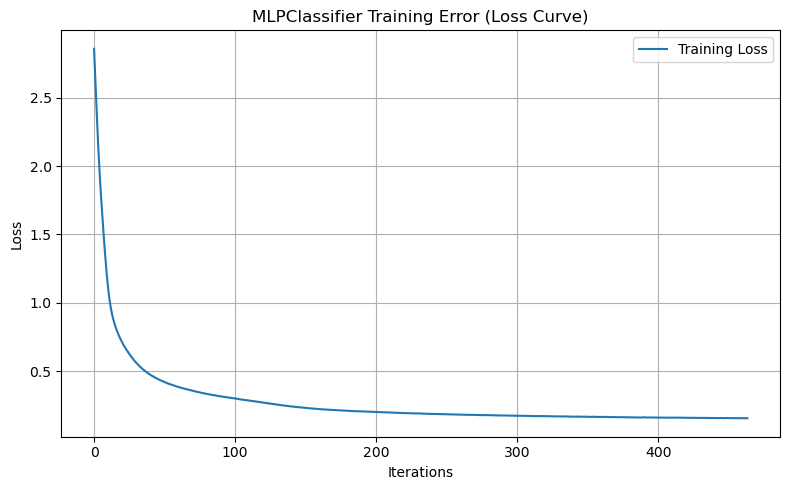

In [8]:
plt.figure(figsize=(8, 5))
plt.plot(mlp.loss_curve_, label='Training Loss')
plt.title("MLPClassifier Training Error (Loss Curve)")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
# Test the ANN
y_pred_train = mlp.predict(X_train)
y_pred_test = mlp.predict(X_test)

In [10]:
# Confusion matrix requires class indices, not one-hot encoded labels. Therefore, we need to convert the one-hot encoded labels back to class indices.
# Basically to reverse what was done in the thrid block of code. 
# Convert one-hot to class indices
y_true_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred_test, axis=1)

In [11]:
# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
classification_report_test = classification_report(y_test, y_pred_test)

conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")
print("Classification Report:\n", classification_report_test)

Training Accuracy: 0.97
Testing Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       731
           1       0.99      0.99      0.99       740
           2       0.95      0.97      0.96       756
           3       0.98      0.96      0.97       773

   micro avg       0.96      0.96      0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000
 samples avg       0.96      0.96      0.96      3000



/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


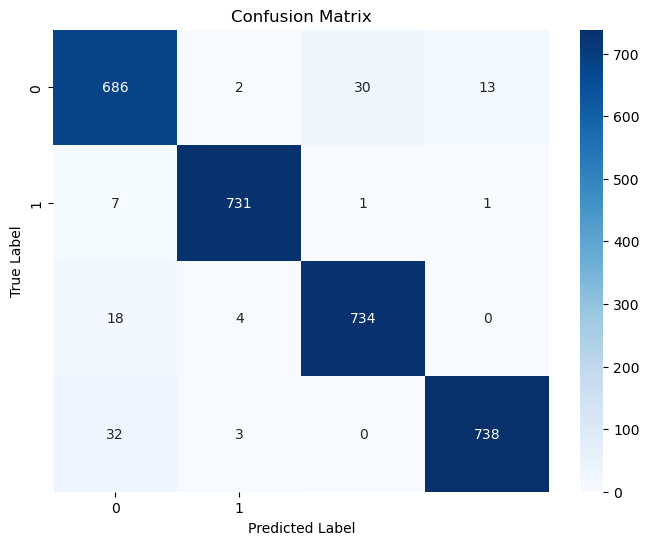

In [12]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [13]:
# Visualization of the decision boundary is also not possible in high dimensional space. This step is rarely done in practice.
""" # Plot the decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap='coolwarm')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')

plt.figure(figsize=(10, 6))
plot_decision_boundary(X_test, y_test, mlp)
plt.show() """

" # Plot the decision boundary\ndef plot_decision_boundary(X, y, model):\n    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1\n    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1\n    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),\n                         np.arange(y_min, y_max, 0.01))\n    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])\n    Z = Z.reshape(xx.shape)\n    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')\n    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap='coolwarm')\n    plt.xlabel('Feature 1')\n    plt.ylabel('Feature 2')\n    plt.title('Decision Boundary')\n\nplt.figure(figsize=(10, 6))\nplot_decision_boundary(X_test, y_test, mlp)\nplt.show() "